In [23]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import re
from scipy import stats

# Fase 1

## Análisis Descriptivo y Versionado Inicial de Datos

### Verificación de dimensiones y valores faltantes

In [24]:
df_unificado = pd.read_csv("data/dataset_unificado.csv")

In [25]:
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 411 entries, dia to HORA
dtypes: float64(409), object(2)
memory usage: 3.8+ MB


In [26]:
df_unificado['Frio (Kw)__Consolidado EE'].describe()

count    1.213000e+03
mean     2.827299e+04
std      1.595166e+05
min      2.310000e+03
25%      1.799700e+04
50%      2.385900e+04
75%      2.936100e+04
max      5.572801e+06
Name: Frio (Kw)__Consolidado EE, dtype: float64

In [27]:
df_unificado.describe()

,EE Envasado / Hl__Consolidado KPI,Unnamed: 67__Consolidado KPI,Meta EE Resto Serv__Consolidado KPI,ET Linea 4/Hl__Consolidado KPI,CO 2 Linea 4 / Hl__Consolidado KPI,Meta Aire Bodega__Consolidado KPI,EE Resto Planta / Hl__Consolidado KPI,EE Agua / Hl__Consolidado KPI,EE Bodega / Hl__Consolidado KPI,Meta EE Caldera__Consolidado KPI,...,Tot Reposo Superior__Totalizadores Glicol,Tot L3. L4 y Planta de CO2__Totalizadores Glicol,"Tot L3, L4 y Planta de CO2__Totalizadores Glicol",Tot Trasiego__Totalizadores Glicol,Tot Reposo Inferior__Totalizadores Glicol,Tot A10/20__Totalizadores Glicol,Tot A40/240/50/60/Centec/Filtro__Totalizadores Glicol,Id__Totalizadores Glicol,Tot A130/330/430__Totalizadores Glicol,Tot Fermantacion_Cocina__Totalizadores Glicol
count,1213.000000,0.0,848.000000,1213.000000,1213.000000,848.000000,1213.000000,1213.000000,1213.000000,848.000000,...,365.000000,365.000000,483.000000,1213.000000,365.000000,848.000000,848.000000,848.000000,848.000000,365.000000
mean,2.524217,NaN,0.455756,11.655629,0.972007,1.519186,0.384387,0.077557,0.994793,0.101279,...,135.747767,1210.616638,3613.647205,1504.849103,5664.484534,2091.933956,2927.414222,26763.672170,4839.680639,1382.553959
std,19.012557,NaN,0.049035,27.087375,0.317157,0.163449,18.856444,1.568732,4.554554,0.010897,...,561.505628,1002.485452,4970.894837,8509.357600,2013.072701,2607.152525,2211.123150,11093.141109,2108.906700,1459.571360
min,0.080662,NaN,0.392143,0.000000,0.000000,1.307143,-587.600356,-29.573295,-0.445517,0.087143,...,0.000000,0.000000,3.750000,0.000000,170.630000,0.000000,0.000000,10049.000000,0.000000,224.910000
25%,1.352666,NaN,0.411429,6.050775,0.913171,1.371429,0.282560,0.042578,0.551459,0.091429,...,1.400000,606.090000,473.025000,673.910000,4410.960000,0.000000,1257.260000,15239.750000,4155.915000,595.690000
50%,1.634823,NaN,0.443571,6.671128,0.936392,1.478571,0.456903,0.063806,0.674888,0.098571,...,3.300000,1023.940000,1161.250000,1282.310000,5633.530000,0.000000,2098.125000,31477.125000,5067.510000,944.340000
75%,1.988969,NaN,0.501429,7.773792,1.031112,1.671429,0.642091,0.090216,0.918966,0.111429,...,12.010000,1453.310000,5107.485000,1689.120000,6959.130000,4874.767500,4057.265000,36770.250000,5984.172500,1515.620000
max,589.066178,NaN,0.558643,500.030000,4.666667,1.862143,283.150905,27.357143,156.964286,0.124143,...,4054.270000,9275.440000,27378.380000,296218.410000,11066.500000,8110.880000,10498.000000,42000.000000,11039.500000,10870.690000


In [28]:
df_unificado

,dia,EE Envasado / Hl__Consolidado KPI,Unnamed: 67__Consolidado KPI,Meta EE Resto Serv__Consolidado KPI,ET Linea 4/Hl__Consolidado KPI,CO 2 Linea 4 / Hl__Consolidado KPI,Meta Aire Bodega__Consolidado KPI,EE Resto Planta / Hl__Consolidado KPI,EE Agua / Hl__Consolidado KPI,EE Bodega / Hl__Consolidado KPI,...,Tot L3. L4 y Planta de CO2__Totalizadores Glicol,"Tot L3, L4 y Planta de CO2__Totalizadores Glicol",Tot Trasiego__Totalizadores Glicol,Tot Reposo Inferior__Totalizadores Glicol,Tot A10/20__Totalizadores Glicol,Tot A40/240/50/60/Centec/Filtro__Totalizadores Glicol,Id__Totalizadores Glicol,Tot A130/330/430__Totalizadores Glicol,Tot Fermantacion_Cocina__Totalizadores Glicol,HORA
0,2020-07-01,2.358593,NaN,NaN,5.435251,0.969237,NaN,-0.790336,-0.023412,0.798838,...,NaN,NaN,1390.52,5349.47,NaN,NaN,10049.0,NaN,694.08,2025-11-03 23:59:00
1,2020-07-02,2.358593,NaN,NaN,5.435251,0.969237,NaN,-0.790336,-0.023412,0.798838,...,NaN,NaN,1390.52,5349.47,NaN,NaN,10049.0,NaN,694.08,2025-11-03 23:59:00
2,2020-07-03,1.985462,NaN,NaN,6.514116,0.960303,NaN,0.249803,0.126352,0.835762,...,NaN,NaN,1390.52,4965.47,NaN,NaN,10074.0,NaN,400.66,2025-11-03 23:59:00
3,2020-07-04,1.442114,NaN,NaN,5.595813,0.970079,NaN,0.235901,0.077983,0.371077,...,NaN,NaN,1390.52,5040.93,NaN,NaN,10099.0,NaN,447.89,2025-11-03 23:59:00
4,2020-07-05,1.664726,NaN,NaN,5.760076,0.967261,NaN,0.363273,0.114267,0.717787,...,NaN,NaN,1390.52,5690.25,NaN,NaN,10124.0,NaN,400.06,2025-11-03 23:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,2023-10-22,0.662392,NaN,0.462857,7.884847,1.074014,1.542857,0.842657,0.025218,0.669597,...,NaN,72.56250,0.00,NaN,254.875,2070.875,41925.0,6019.625,NaN,2025-11-03 23:59:00
1209,2023-10-23,6.849231,NaN,0.462857,7.884847,1.074014,1.542857,8.673805,0.155897,5.911795,...,NaN,74.53125,0.00,NaN,790.625,1828.250,41950.0,6030.000,NaN,2025-11-03 23:59:00
1210,2023-10-24,5.912064,NaN,0.462857,7.884847,1.074014,1.542857,4.517062,0.089008,3.651475,...,NaN,79.78125,0.00,NaN,1567.000,728.500,41975.0,6006.000,NaN,2025-11-03 23:59:00
1211,2023-10-25,3.451703,NaN,0.462857,7.884847,1.074014,1.542857,3.454365,0.060922,2.942685,...,NaN,54.93750,0.00,NaN,840.500,1191.625,42000.0,5969.625,NaN,2025-11-03 23:59:00


In [29]:
df_unificado.isna().sum().sort_values(ascending=False).head(119)

Unnamed: 21__Consolidado KPI                             1213
Unnamed: 66__Consolidado KPI                             1213
Unnamed: 113__Consolidado KPI                            1213
Unnamed: 103__Consolidado KPI                            1213
Unnamed: 22__Consolidado KPI                             1213
                                                         ... 
Nivel Silo Bagazo Norte (1)__Totalizadores Produccion     309
KW Trafo 8__Totalizadores Energia                          19
Totalizador Bba P51__Totalizadores Efluentes                8
Totalizador Bba P4__Totalizadores Efluentes                 8
Totalizador Bba P2__Totalizadores Efluentes                 8
Length: 119, dtype: int64

In [30]:
na_counts = df_unificado.isna().sum()
vars_300 = na_counts[na_counts >= 300].index.tolist()
df_unificado = df_unificado.drop(columns=vars_300, errors="ignore")

In [31]:
# Cuenta ceros
zero_counts = (df_unificado.eq(0) | df_unificado.eq("0")).sum(axis=0)
zero_ratio  = ((zero_counts / len(df_unificado)) * 100).sort_values(ascending=False)

umbral = 50.0
muchos_ceros = zero_ratio[zero_ratio >= umbral]

print("\nColumnas con ≥", umbral, "% ceros:", len(muchos_ceros), 'de', len(df_unificado.columns), "columnas totales")
print()
print(muchos_ceros.apply(lambda x: f"{x:.2f}%"))


Columnas con ≥ 50.0 % ceros: 53 de 296 columnas totales

HL Mosto Bieckert__Totalizadores Produccion                100.00%
Hl Reserva 8__Totalizadores Produccion                     100.00%
Kw llum/Serv L2__Totalizadores Energia                     100.00%
Tot_Vapor_Caldera 3__Totalizadores Gas y Vapor             100.00%
Fuel Oil Tk2 (Kg)__Totalizadores Gas y Vapor               100.00%
Fuel Oil Tk1 (Kg)__Totalizadores Gas y Vapor               100.00%
VAPOR DE CALDERA 1 KG__Totalizadores Gas y Vapor           100.00%
HL Mosto Local__Totalizadores Produccion                   100.00%
HL Mosto Malta__Totalizadores Produccion                   100.00%
HL Mosto Frost__Totalizadores Produccion                   100.00%
HL Mosto Palermo__Totalizadores Produccion                 100.00%
HL Mosto Budweiser__Totalizadores Produccion               100.00%
HL Mosto Indio__Totalizadores Produccion                   100.00%
HL Mosto Fuerte__Totalizadores Produccion                  100.00%
KW L

In [32]:
cols_muchos_ceros = muchos_ceros.index.tolist()
df_unificado = df_unificado.drop(columns=cols_muchos_ceros, errors="ignore")

### Detección de valores atípicos

Totales detectados por cada método:
    columna  outliers_IQR  outliers_Zmod
0   TOTAL         10846          15428

Detectamos outliers con el método de rango interquarlitico y aplicamos imputación por kNN a outliers y nulos

In [33]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# (Asumo que 'df_unificado' ya está cargado)

# --- 0) PREPARACIÓN DE LA COLUMNA DE TIEMPO (¡Sin tocar el índice!) ---
# Convertir la columna 'dia' a formato datetime
df_unificado['dia'] = pd.to_datetime(df_unificado['dia'])

# Asegurarse de que esté ordenado cronológicamente por la columna 'dia'
# ¡IMPORTANTE! Usamos reset_index(drop=True) para re-generar el índice (0, 1, 2...)
# Esto es vital para que la imputación KNN funcione correctamente después.
df_unificado = df_unificado.sort_values(by='dia').reset_index(drop=True)

# Obtener columnas numéricas
# (Nos aseguramos de que 'dia' no esté, aunque to_datetime la saca de 'number')
num_cols = df_unificado.select_dtypes(include=[np.number]).columns


# --- 1) DIVISIÓN DE DATOS (Usando la columna 'dia') ---
# Todo lo anterior a 2023 es entrenamiento
# Usamos .loc con la condición booleana sobre la columna 'dia'
df_train = df_unificado.loc[df_unificado['dia'] < '2023-01-01'].copy()
# Todo 2023 (y en adelante) es test
df_test = df_unificado.loc[df_unificado['dia'] >= '2023-01-01'].copy()

print(f"Tamaño Train: {df_train.shape}")
print(f"Tamaño Test:  {df_test.shape}")


# --- 2) TRATAMIENTO DE OUTLIERS (Sin Data Leakage) ---
# (Este código no cambia, ya que opera sobre los dataframes separados)

# 2a. Aprendemos los umbrales SOLO del set de entrenamiento
thresholds = {}
for c in num_cols:
    s = df_train[c].dropna()
    if s.empty:
        thresholds[c] = (np.nan, np.nan) # No hay datos para calcular
        continue
        
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    
    if iqr == 0:
        thresholds[c] = (s.min(), s.max()) # Usar min/max si no hay varianza
    else:
        k = 1.5
        low, high = q1 - k*iqr, q3 + k*iqr
        thresholds[c] = (low, high)

# 2b. Aplicamos esos umbrales a AMBOS sets
df_train_nan = df_train.copy()
df_test_nan = df_test.copy()

for c in num_cols:
    low, high = thresholds[c]
    if not np.isnan(low): # Solo aplicar si los umbrales son válidos
        df_train_nan[c] = df_train_nan[c].mask((df_train_nan[c] < low) | (df_train_nan[c] > high))
        df_test_nan[c] = df_test_nan[c].mask((df_test_nan[c] < low) | (df_test_nan[c] > high))


# --- 3) IMPUTACIÓN KNN (Sin Data Leakage) ---
# (Este código tampoco cambia. Usa el índice numérico [0, 1, 2...] que preservamos)

# 3a. Inicializar el imputador
imp = KNNImputer(n_neighbors=5, weights="distance")

# 3b. Limpiar inf y -inf antes de imputar
df_train_nan[num_cols] = df_train_nan[num_cols].replace([np.inf, -np.inf], np.nan)
df_test_nan[num_cols] = df_test_nan[num_cols].replace([np.inf, -np.inf], np.nan)

# 3c. FIT (Aprender) SOLO con datos de TRAIN
imp.fit(df_train_nan[num_cols])

# 3d. TRANSFORM (Aplicar) en AMBOS sets por separado
train_imp_vals = imp.transform(df_train_nan[num_cols])
test_imp_vals = imp.transform(df_test_nan[num_cols])

# 3e. Reconstruir los DataFrames imputados
df_train_imputado = df_train.copy()
df_test_imputado = df_test.copy()

# (Esta asignación funciona porque los índices [0, 1, 2...] de los arrays 
#  se alinean con los índices de df_train y df_test que preservamos)
df_train_imputado[num_cols] = pd.DataFrame(train_imp_vals, index=df_train.index, columns=num_cols)
df_test_imputado[num_cols] = pd.DataFrame(test_imp_vals, index=df_test.index, columns=num_cols)

print("\n¡Proceso completado sin data leakage!")
print("DataFrames listos: df_train_imputado, df_test_imputado")

Tamaño Train: (914, 243)
Tamaño Test:  (299, 243)

¡Proceso completado sin data leakage!
DataFrames listos: df_train_imputado, df_test_imputado


In [34]:
df_train = df_train_imputado.copy()
df_test = df_test_imputado.copy()

In [36]:
# Muestra solo los ÚLTIMOS 5 días (el índice) de df_train
print("--- Últimos 5 días de df_train (Entrenamiento) ---")
print(df_train["dia"].tail())

print("\n" + "="*50 + "\n")

# Muestra solo los PRIMEROS 5 días (el índice) de df_test
print("--- Primeros 5 días de df_test (Prueba) ---")
print(df_test["dia"].head())

--- Últimos 5 días de df_train (Entrenamiento) ---
909   2022-12-27
910   2022-12-28
911   2022-12-29
912   2022-12-30
913   2022-12-31
Name: dia, dtype: datetime64[ns]


--- Primeros 5 días de df_test (Prueba) ---
914   2023-01-01
915   2023-01-02
916   2023-01-03
917   2023-01-04
918   2023-01-05
Name: dia, dtype: datetime64[ns]


In [39]:
df_train

,dia,EE Envasado / Hl__Consolidado KPI,ET Linea 4/Hl__Consolidado KPI,CO 2 Linea 4 / Hl__Consolidado KPI,EE Resto Planta / Hl__Consolidado KPI,EE Agua / Hl__Consolidado KPI,EE Bodega / Hl__Consolidado KPI,ET Linea 3/Hl__Consolidado KPI,Agua Linea 5/Hl__Consolidado KPI,CO 2 / Hl__Consolidado KPI,...,Totalizador_Filtracion__Totalizadores CO2,Totalizador_Tq_Pulmon__Totalizadores CO2,Totaliador_Latas__Totalizadores CO2,Totalizador Bba P51__Totalizadores Efluentes,Totalizador Bba P4__Totalizadores Efluentes,Totalizador Bba Envasado__Totalizadores Efluentes,Totalizador Bba P1__Totalizadores Efluentes,Totalizador Bba P2__Totalizadores Efluentes,Tot Trasiego__Totalizadores Glicol,HORA
0,2020-07-01,2.358593,5.435251,0.969237,0.696844,0.075016,0.798838,12.047473,0.000000,0.782875,...,5217.0,14295.0,5041.000000,141707.000000,165643.000000,6743.000000,61669.556403,101628.399773,1390.520,2025-11-03 23:59:00
1,2020-07-02,2.358593,5.435251,0.969237,0.625419,0.089732,0.798838,12.047473,0.000000,0.782875,...,5217.0,14295.0,5041.000000,141707.000000,165643.000000,6743.000000,36406.751822,64897.242459,1390.520,2025-11-03 23:59:00
2,2020-07-03,1.985462,6.514116,0.960303,0.249803,0.126352,0.835762,15.512192,0.000000,0.689543,...,3475.0,8366.0,5201.000000,136375.416648,168752.000000,11812.000000,67611.783559,62453.566116,1390.520,2025-11-03 23:59:00
3,2020-07-04,1.442114,5.595813,0.970079,0.235901,0.077983,0.371077,11.598608,1.765273,0.275763,...,3344.0,5081.0,5155.000000,117707.612618,165422.106905,6364.000000,71021.934476,78985.649272,1390.520,2025-11-03 23:59:00
4,2020-07-05,1.664726,5.760076,0.967261,0.363273,0.114267,0.717787,24.778109,1.177719,0.541448,...,5424.0,12559.0,5318.000000,97939.621515,195818.554737,8336.000000,71802.757238,86894.773103,1390.520,2025-11-03 23:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,2022-12-27,2.277306,6.841537,0.913356,0.715387,0.089023,0.988200,21.332465,3.060606,0.209961,...,210.0,5550.0,4055.074142,121366.000000,0.000000,121372.000000,78122.000000,35395.000000,535.940,2025-11-03 23:59:00
910,2022-12-28,1.596293,7.574623,0.940518,0.574977,0.030609,0.600824,17.727900,2.021739,0.685804,...,1787.0,8712.0,4850.466691,234216.000000,234466.000000,126309.000000,84259.000000,61461.000000,1783.460,2025-11-03 23:59:00
911,2022-12-29,2.747230,6.706450,0.935892,0.509444,0.078910,1.239176,20.038644,1.219512,0.592444,...,1879.0,6683.0,4876.710852,129208.164302,269806.000000,114222.000000,8157.000000,56639.000000,831.130,2025-11-03 23:59:00
912,2022-12-30,0.930847,7.626670,0.922833,0.513903,0.014328,0.378449,16.290415,1.630682,0.290179,...,3214.0,4534.0,4759.430326,168098.271092,144503.000000,106178.000000,76145.000000,50581.000000,611.060,2025-11-03 23:59:00


In [40]:
df_train['Frio'] = df_train['Frio (Kw)__Consolidado EE'].shift(-1)
df_train = df_train.iloc[1:-1].reset_index(drop=True)
df_train = df_train.drop(columns=['Frio (Kw)__Consolidado EE'])

In [41]:
from tools import checksum
checksum(df_train, 'df_train')

'Checksum calculado y guardado: 624edab8aaec1f0263000d908ec384c5'

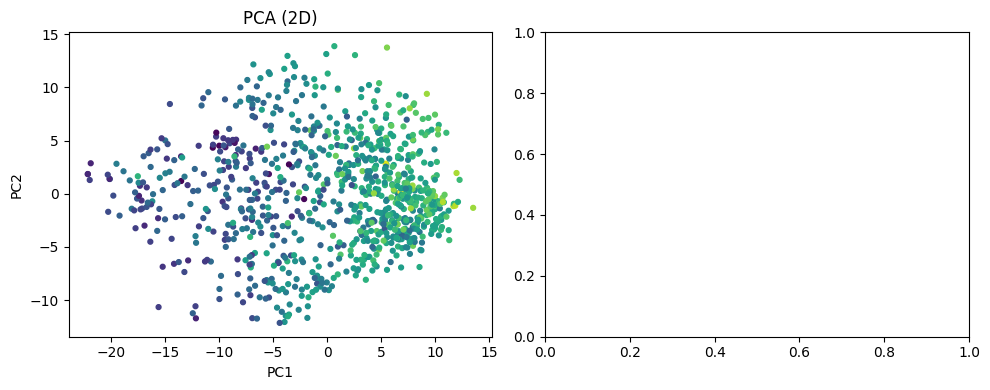

       pca1      pca2     Frio
0 -1.231919 -0.684360  28268.0
1  0.963102 -1.659285  24246.0
2  7.594253 -4.233469  29885.0
3  4.093997 -2.521559  24449.0
4  5.298676 -2.051053  24435.0


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from umap import UMAP

# --- separar features numéricas y target ---
y = df_train['Frio'].to_numpy()
X = df_train.drop(columns=['Frio']).select_dtypes(include='number')

# por si quedó algún NaN
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median(numeric_only=True))

# --- escalar ---
Xs = StandardScaler().fit_transform(X)

# --- PCA 2D ---
pca_2d = PCA(n_components=2, random_state=0).fit_transform(Xs)

# --- UMAP 2D (parámetros básicos y estables) ---
#umap_2d = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=0).fit_transform(Xs)

# --- DataFrame con embeddings y target (opcional para guardar/analizar) ---
embeds = pd.DataFrame({
    'pca1': pca_2d[:,0], 'pca2': pca_2d[:,1],
    #'umap1': umap_2d[:,0], 'umap2': umap_2d[:,1],
    'Frio': y
})

# --- plots simples ---
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sc1 = axes[0].scatter(embeds['pca1'], embeds['pca2'], c=embeds['Frio'], s=12)
axes[0].set_title('PCA (2D)'); axes[0].set_xlabel('PC1'); axes[0].set_ylabel('PC2')

#sc2 = axes[1].scatter(embeds['umap1'], embeds['umap2'], c=embeds['Frio'], s=12)
#axes[1].set_title('UMAP (2D)'); axes[1].set_xlabel('UMAP1'); axes[1].set_ylabel('UMAP2')

#cbar = fig.colorbar(sc2, ax=axes.ravel().tolist(), shrink=0.8)
#cbar.set_label('Frio')

plt.tight_layout()
plt.show()

# Si querés ver las primeras filas:
print(embeds.head())

##  Análisis Temporal

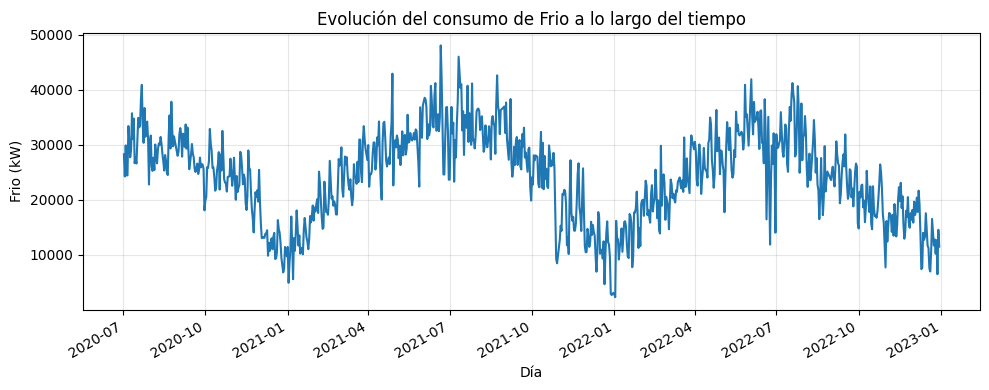

In [43]:
# Copia y limpieza básica
evol = df_train.copy()

# Asegurar fecha válida (formato día/mes/año) y quedarnos con fecha sola
evol["dia"] = pd.to_datetime(evol["dia"], format="%Y-%m-%d", dayfirst=True, errors="coerce").dt.date

# Quitar filas problemáticas y ordenar
evol = evol.dropna(subset=["dia", "Frio"]).sort_values("dia")

# Si hay varias filas por día, tomar el total diario (máximo/último)
evol_dia = evol.groupby("dia", as_index=False)["Frio"].max()

# Graficar
plt.figure(figsize=(10,4))
plt.plot(evol_dia["dia"], evol_dia["Frio"])
plt.xlabel("Día"); plt.ylabel("Frio (kW)")
plt.title("Evolución del consumo de Frio a lo largo del tiempo")
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

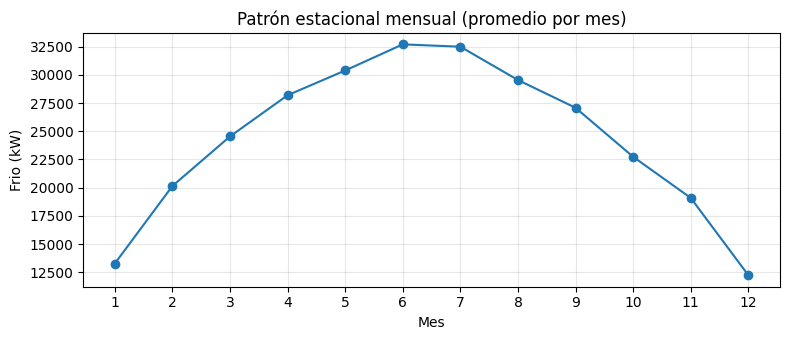

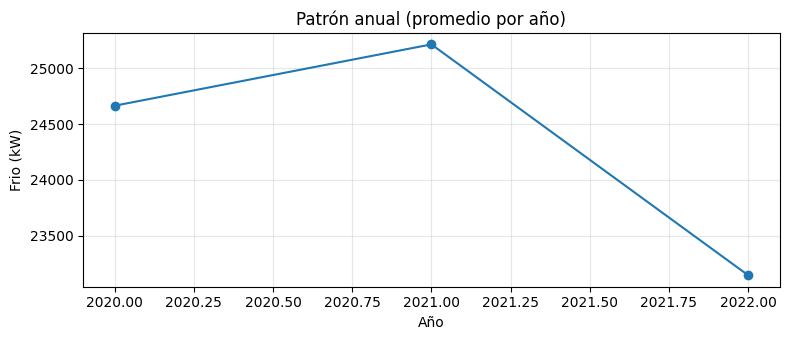

In [44]:
# --- preparar datos ---
g = df_train.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia", "Frio"]).sort_values("dia")
g["año"] = g["dia"].dt.year
g["mes"] = g["dia"].dt.month

# --- estacionalidad mensual (promedio por mes, agregando todas las años) ---
mensual = g.groupby("mes")["Frio"].mean()

plt.figure(figsize=(8,3.5))
plt.plot(mensual.index, mensual.values, marker="o")
plt.xticks(range(1,13))
plt.xlabel("Mes"); plt.ylabel("Frio (kW)")
plt.title("Patrón estacional mensual (promedio por mes)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- patrón anual (promedio por año) ---
anual = g.groupby("año")["Frio"].mean()

plt.figure(figsize=(8,3.5))
plt.plot(anual.index, anual.values, marker="o")
plt.xlabel("Año"); plt.ylabel("Frio (kW)")
plt.title("Patrón anual (promedio por año)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

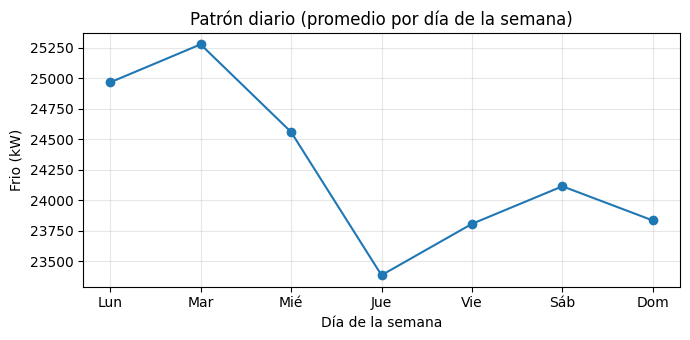

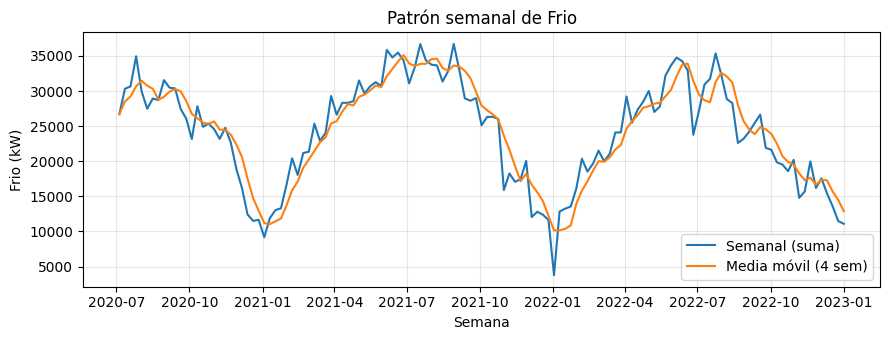

In [45]:
g = df_train.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia", "Frio"]).sort_values("dia")

# -----------------------
# Patrón DIARIO (por día de la semana)
# -----------------------
nombres_dow = {0:"Lun", 1:"Mar", 2:"Mié", 3:"Jue", 4:"Vie", 5:"Sáb", 6:"Dom"}
g["dow"] = g["dia"].dt.dayofweek
diario = g.groupby("dow")["Frio"].mean().reindex(range(7))

plt.figure(figsize=(7,3.5))
plt.plot([nombres_dow[d] for d in diario.index], diario.values, marker="o")
plt.xlabel("Día de la semana"); plt.ylabel("Frio (kW)")
plt.title("Patrón diario (promedio por día de la semana)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# (opcional rápido: variabilidad por día de la semana)
# g.boxplot(column="Frio", by="dow", figsize=(8,4))
# plt.suptitle(""); plt.title("Distribución de Frio por día de la semana")
# plt.xlabel("Día de la semana (0=Lun..6=Dom)"); plt.ylabel("Frio (kW)")
# plt.tight_layout(); plt.show()

# -----------------------
# Patrón SEMANAL
# -----------------------
# Reindexar por fecha para resamplear
g = g.set_index("dia")

# Consumo semanal (suma por semana) + media móvil para suavizar
semanal = g["Frio"].resample("W").mean()
suavizada = semanal.rolling(4, min_periods=1).mean()  # ~promedio de 4 semanas

plt.figure(figsize=(9,3.5))
plt.plot(semanal.index, semanal.values, label="Semanal (suma)")
plt.plot(suavizada.index, suavizada.values, label="Media móvil (4 sem)")
plt.xlabel("Semana"); plt.ylabel("Frio (kW)")
plt.title("Patrón semanal de Frio")
plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [47]:
g = df_train.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia","Frio"]).sort_values("dia")

# Día de la semana (0=Lun..6=Dom)
g["dow"] = g["dia"].dt.dayofweek

pearson = g["dow"].corr(g["Frio"])
print("Pearson(dow, Frio):", round(float(pearson), 4))

Pearson(dow, Frio): -0.0569


In [48]:
# preparar datos
g = df_train.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia", "Frio"])
g["dow"] = g["dia"].dt.dayofweek  # 0=Lun..6=Dom
nombres = {0:"Lun",1:"Mar",2:"Mié",3:"Jue",4:"Vie",5:"Sáb",6:"Dom"}

# eta² (ANOVA)
y = g["Frio"].values
y_mean = y.mean()
ss_total = ((y - y_mean)**2).sum()

ss_between = 0.0
for d in range(7):
    yi = g.loc[g["dow"]==d, "Frio"].values
    if len(yi) == 0: 
        continue
    ss_between += len(yi) * (yi.mean() - y_mean)**2

eta2 = ss_between / ss_total if ss_total > 0 else np.nan
print("Eta²(día_semana → Frio):", round(float(eta2), 4))

# resumen por día para interpretar
print("\nPromedio por día:")
print(g.groupby("dow")["Frio"].mean().rename(index=nombres).round(2))

Eta²(día_semana → Frio): 0.0061

Promedio por día:
dow
Lun    24968.14
Mar    25279.65
Mié    24561.12
Jue    23386.84
Vie    23807.75
Sáb    24115.85
Dom    23835.41
Name: Frio, dtype: float64


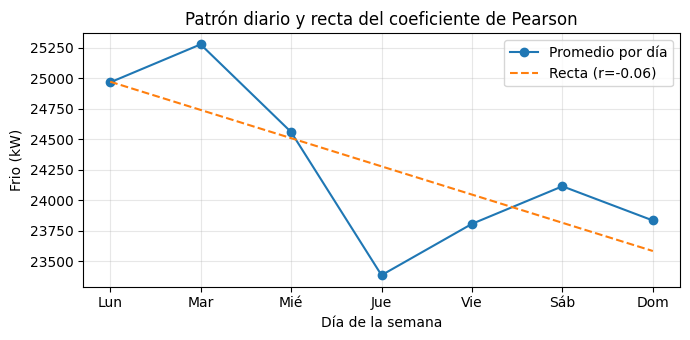

In [49]:
# Serie de promedios por día (ya la tenés como 'diario')
x = diario.index.values.astype(float)       # 0..6
y = diario.values

# Ajuste lineal y Pearson (r) con datos diarios crudos
m, b = np.polyfit(x, y, 1)
r = g["dow"].corr(g["Frio"])  # correlación Pearson día-de-semana vs Frio (datos diarios)

# Plot con recta
plt.figure(figsize=(7,3.5))
plt.plot(x, y, marker="o", label="Promedio por día")
plt.plot(x, m*x + b, linestyle="--", label=f"Recta (r={r:.2f})")
plt.xticks(x, [nombres_dow[int(d)] for d in x])
plt.xlabel("Día de la semana"); plt.ylabel("Frio (kW)")
plt.title("Patrón diario y recta del coeficiente de Pearson")
plt.grid(True, alpha=0.3); plt.legend()
plt.tight_layout()
plt.show()

## Análisis de Correlaciones

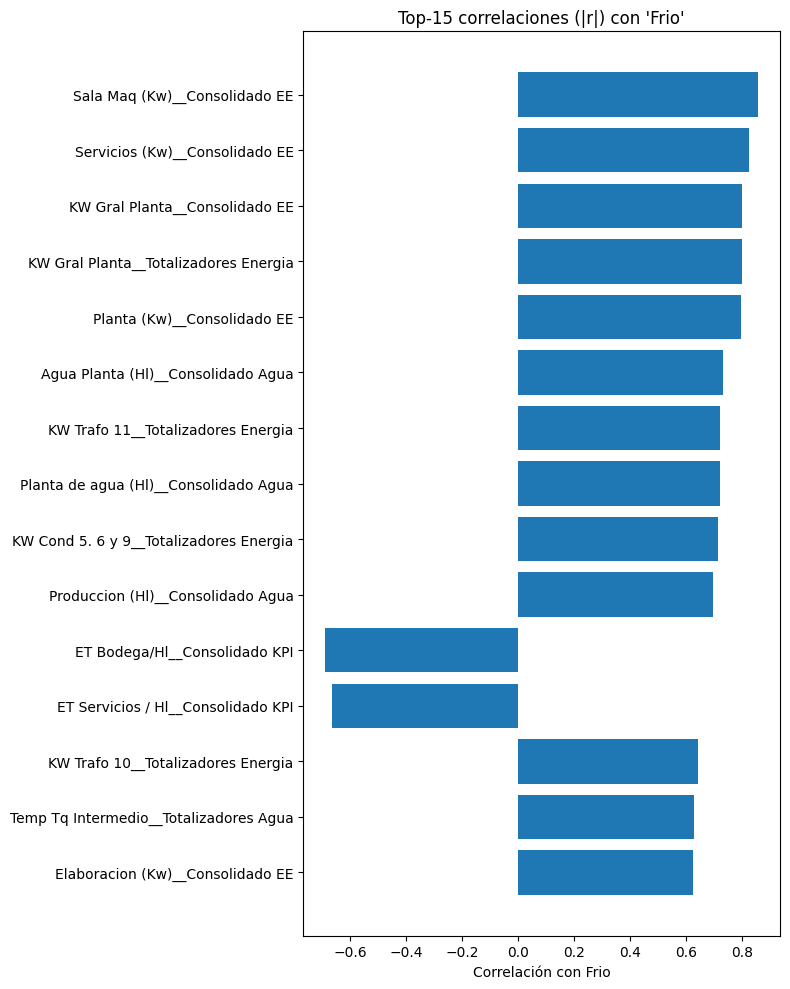

In [50]:
# (opcional) si tenés seaborn, activá este bloque para mejor visualización
try:
    import seaborn as sns
    HAS_SNS = True
except Exception:
    HAS_SNS = False

# --- preparar numéricas ---
g = df_train.copy()
num = g.select_dtypes(include=["number"])  # solo columnas numéricas
corr = num.corr(method="pearson")

# ---------------------------
# 1) Top-30 correlaciones con 'Frio'
# ---------------------------
if "Frio" in corr.columns:
    cor_frio = corr["Frio"].drop("Frio").sort_values(key=np.abs, ascending=False).head(15)

    plt.figure(figsize=(8, 10))
    plt.barh(cor_frio.index[::-1], cor_frio.values[::-1])
    plt.xlabel("Correlación con Frio")
    plt.title("Top-15 correlaciones (|r|) con 'Frio'")
    plt.tight_layout()
    plt.show()
else:
    print("⚠ No se encontró la columna 'Frio' entre las numéricas.")

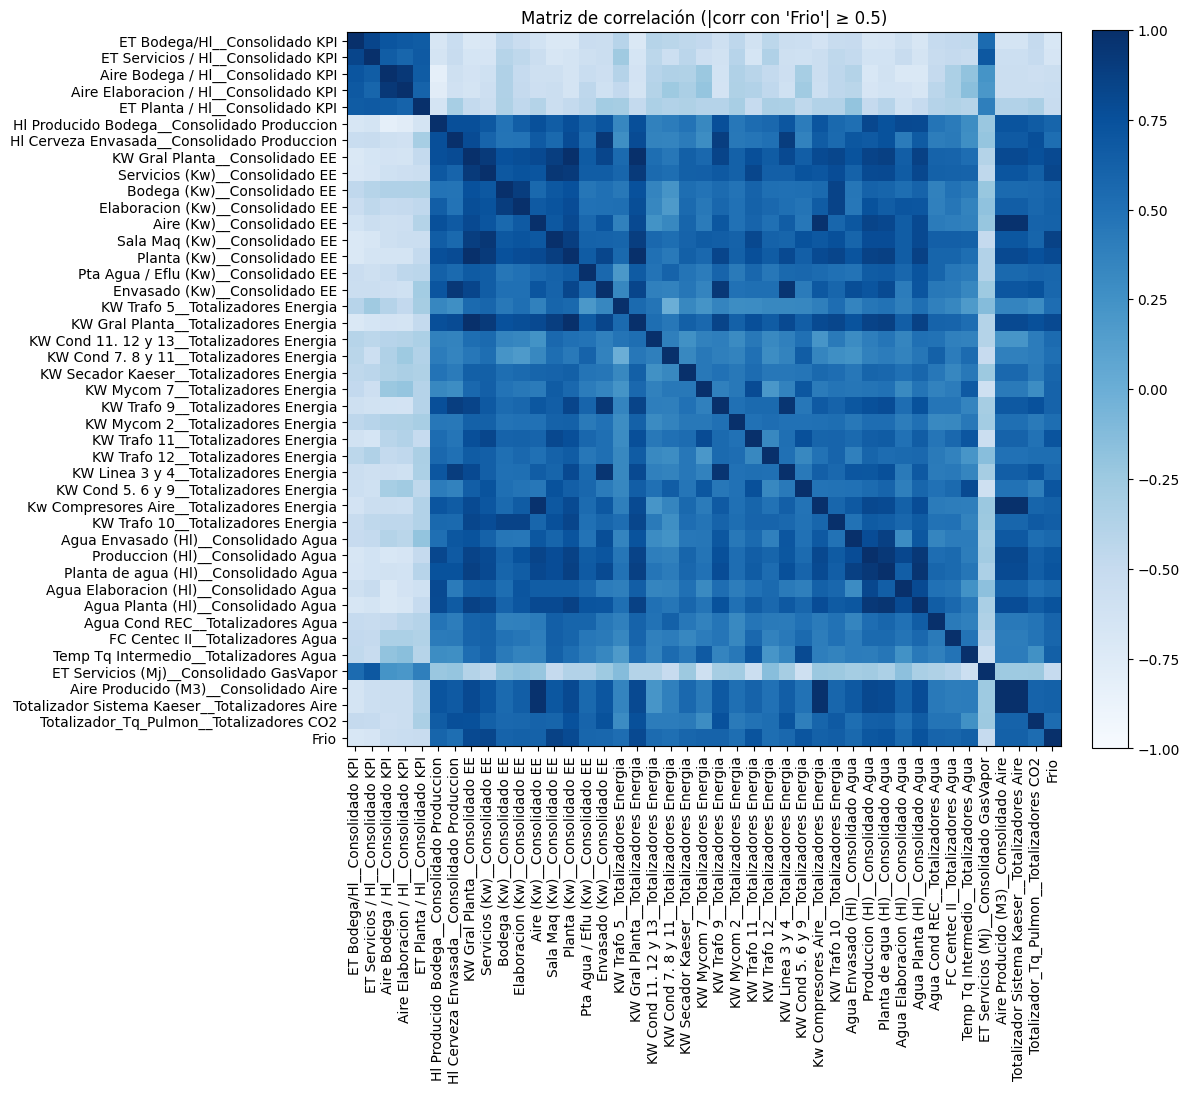

In [51]:
# --- parámetro: umbral de correlación absoluta con 'Frio' ---
UMBRAL = 0.50  # cambiá este valor

# --- preparar numéricas ---
g = df_train.copy()
num = g.select_dtypes(include="number").copy()

# seguridad: descartar columnas constantes (std=0) que rompen la correlación
const_cols = num.columns[num.std(numeric_only=True) == 0]
num = num.drop(columns=const_cols, errors="ignore")

# correlaciones absolutas
corr_abs = num.corr(method="pearson").abs()

if "Frio" not in corr_abs.columns:
    raise ValueError("No se encontró la columna numérica 'Frio' para filtrar por umbral.")

# columnas cuyo |corr con Frio| >= UMBRAL (incluye a 'Frio')
cols = corr_abs.index[corr_abs["Frio"] >= UMBRAL].tolist()

if len(cols) < 2:
    print(f"No hay suficientes variables con |corr| >= {UMBRAL}.")
else:
    subcorr = num[cols].corr(method="pearson")

    # --- plot legible ---
    n = len(cols)
    fig_w = min(12, 0.4 * n + 3)  # tamaño dinámico
    fig_h = min(12, 0.4 * n + 3)

    plt.figure(figsize=(fig_w, fig_h))
    im = plt.imshow(subcorr.values, vmin=-1, vmax=1, cmap="Blues")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(n), cols, rotation=90)
    plt.yticks(range(n), cols)
    plt.title(f"Matriz de correlación (|corr con 'Frio'| ≥ {UMBRAL})")
    plt.tight_layout()
    plt.show()

In [52]:
# --- 0) Preparar predictores numéricos (sin el target) ---
target = "Frio"
X = df_train.select_dtypes("number").drop(columns=[target], errors="ignore").copy()

# quitar columnas constantes o casi constantes (evita VIF infinito)
const_cols = [c for c in X.columns if X[c].nunique(dropna=True) <= 1]
X = X.drop(columns=const_cols)

# opcional: reemplazar inf y dropear filas totalmente NA
X = X.replace([np.inf, -np.inf], np.nan)

# --- 1) Correlación entre predictores ---
corr_pred = X.corr()

# Pares de predictores con |corr| alta (e.g., > 0.9)
thr = 0.90
mask = np.triu(np.ones_like(corr_pred, dtype=bool), k=1)
corr_pairs = (
    corr_pred.where(mask)
    .stack()
    .rename("corr")
    .reindex(corr_pred.columns, level=0)
    .reindex(corr_pred.columns, level=1)
    .reset_index()
    .rename(columns={"level_0": "feat_1", "level_1": "feat_2"})
)
altos = corr_pairs[np.abs(corr_pairs["corr"]) >= thr].sort_values(by="corr", key=np.abs, ascending=False)

print("=== Columnas constantes eliminadas ===")
print(const_cols)
print("\n=== Pares de predictores con |corr| >= {:.2f} ===".format(thr))
print(altos.head(50))  # muestra los 50 más fuertes



=== Columnas constantes eliminadas ===
[]

=== Pares de predictores con |corr| >= 0.90 ===
                                              feat_1  \
28457          Totalizador_Aire_L5__Consolidado Aire   
27366     Tot_Vapor_CIP_Bodega__Consolidado GasVapor   
5472         Agua Planta de Agua/Hl__Consolidado KPI   
23451                       Red L3__Consolidado Agua   
23755                  FC Barriles__Consolidado Agua   
24242                   FC L1 y L2__Consolidado Agua   
24338                  Red L1 y L2__Consolidado Agua   
24431                 Red Paste L4__Consolidado Agua   
24524               FC Lavadora L3__Consolidado Agua   
27153      VAPOR DE LINEA 4 KG__Consolidado GasVapor   
27197      Vapor Servicio (Kg)__Consolidado GasVapor   
27210      Vapor Servicio (Kg)__Consolidado GasVapor   
14673                 KW Gral Planta__Consolidado EE   
27261          Tot_Vapor_L3_L4__Consolidado GasVapor   
12220    Cocimientos Diarios__Consolidado Produccion   
12033        

## Visualizaciones Requeridas

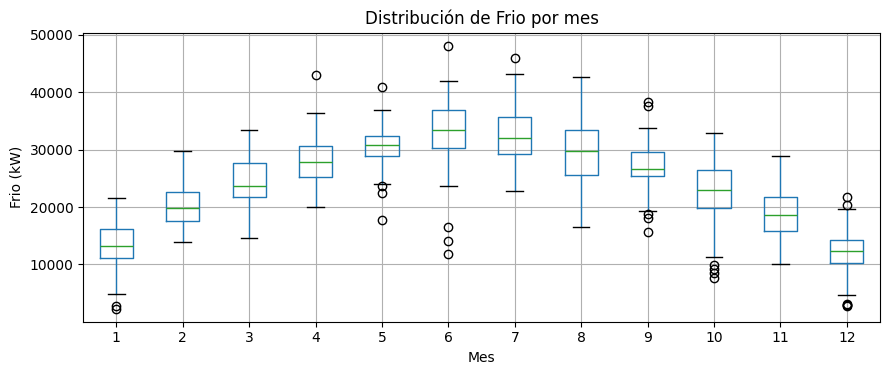

In [53]:
# --- preparar datos ---
g = df_train.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia", "Frio"]).sort_values("dia")
g["año"] = g["dia"].dt.year
g["mes"] = g["dia"].dt.month

g.boxplot(column="Frio", by="mes", figsize=(9,4))
plt.suptitle(""); plt.title("Distribución de Frio por mes"); plt.xlabel("Mes"); plt.ylabel("Frio (kW)")
plt.tight_layout()
plt.show()

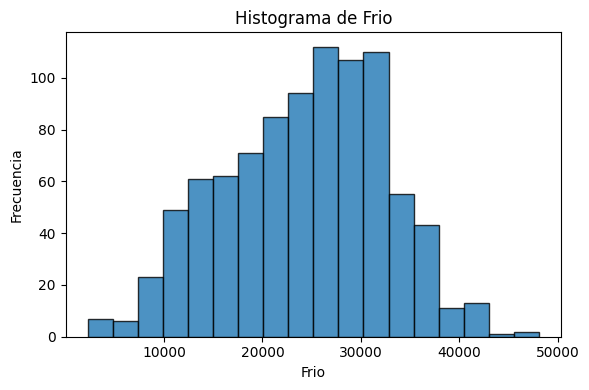

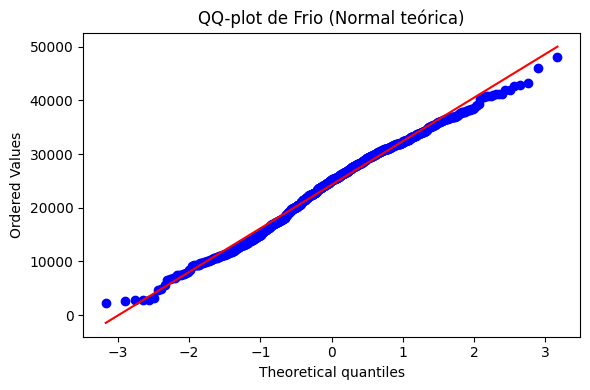

In [54]:
# --- Serie limpia ---
s = df_train["Frio"].replace([np.inf, -np.inf], np.nan).dropna()

# --- Histograma ---
plt.figure(figsize=(6,4))
plt.hist(s, bins="auto", edgecolor="k", alpha=0.8)
plt.xlabel("Frio")
plt.ylabel("Frecuencia")
plt.title("Histograma de Frio")
plt.tight_layout()
plt.show()

# --- QQ-plot (vs Normal) ---
plt.figure(figsize=(6,4))
stats.probplot(s, dist="norm", plot=plt)
plt.title("QQ-plot de Frio (Normal teórica)")
plt.tight_layout()
plt.show()

Top 6 por |corr| con 'Frio':
Sala Maq (Kw)__Consolidado EE            0.857872
Servicios (Kw)__Consolidado EE           0.825923
KW Gral Planta__Consolidado EE           0.799810
KW Gral Planta__Totalizadores Energia    0.799810
Planta (Kw)__Consolidado EE              0.796785
Agua Planta (Hl)__Consolidado Agua       0.731974
dtype: float64


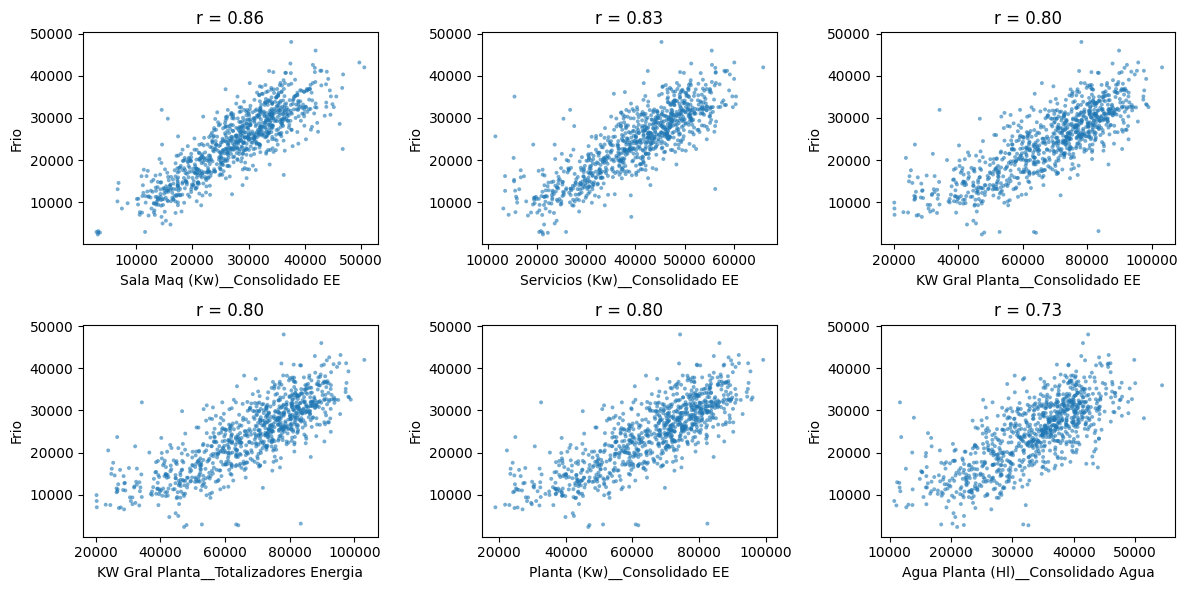

In [55]:
target = "Frio"
max_points = 5000  # ponelo en None para usar todos los puntos

# --- 1) Selección y ranking por correlación absoluta con "Frio" ---
num = df_train.select_dtypes("number").copy()
y = num[target].replace([np.inf, -np.inf], np.nan)

X = num.drop(columns=[target], errors="ignore").replace([np.inf, -np.inf], np.nan)

corrs = X.corrwith(y)                     # Pearson con signo
top5 = corrs.abs().sort_values(ascending=False).head(6).index.tolist()

print("Top 6 por |corr| con 'Frio':")
print(corrs.loc[top5].sort_values(key=np.abs, ascending=False))

# --- 2) Scatter plots en grilla 2x3 (5 plots + 1 vacío oculto) ---
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3), squeeze=False)

for i, feat in enumerate(top5):
    ax = axes.flat[i]
    datos = pd.concat([X[feat], y], axis=1, keys=[feat, target]).dropna()
    if max_points is not None and len(datos) > max_points:
        datos = datos.sample(max_points, random_state=0)

    ax.scatter(datos[feat], datos[target], s=8, alpha=0.6, edgecolors="none")
    ax.set_xlabel(feat)
    ax.set_ylabel(target)
    ax.set_title(f"r = {corrs[feat]:.2f}")

# ocultar el subplot sobrante (si lo hay)
for j in range(len(top5), rows*cols):
    axes.flat[j].axis("off")

plt.tight_layout()
plt.show()

=== Consumo (asignación proxy) de Frio por área ===
              Frio_total  %_del_total
Servicios    13099281.53        59.16
Envasado      4139987.88        18.70
Elaboración   3091170.41        13.96
Bodega        1463705.02         6.61
Sala Maq       347169.67         1.57


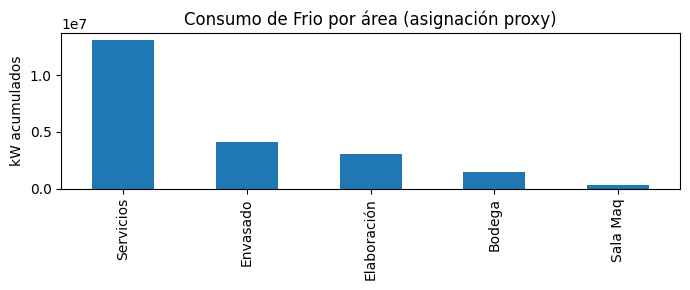

C:\Users\out6let\AppData\Local\Temp\ipykernel_16436\958782055.py:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  area_frio.resample("M").sum().plot(figsize=(9,4), alpha=0.85)


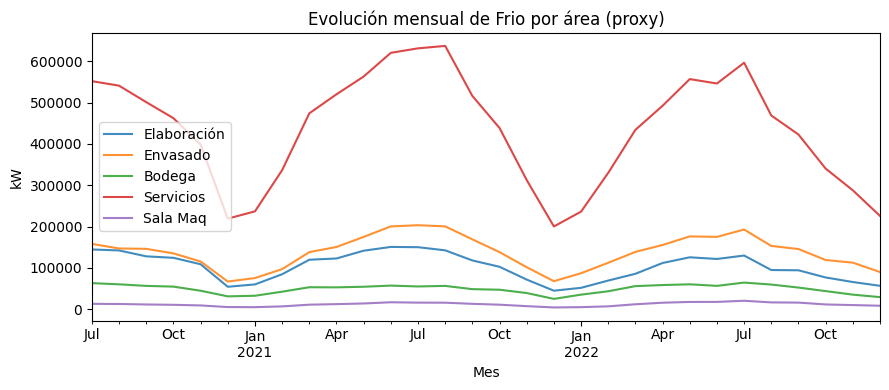

In [56]:
# --- 0) Usar tu DF ya cargado ---
df = df_train.copy() 

# --- 1) Columna de Frio (elige la que tengas) ---
FRIO_CANDIDATAS = ["Frio (Kw)__Consolidado EE", "Frio"]
FRIO_COL = next((c for c in FRIO_CANDIDATAS if c in df.columns), None)
assert FRIO_COL is not None, "No encuentro la columna de 'Frio'."

# --- 2) Patrones por área (ajustá si hace falta) ---
AREAS = {
    "Elaboración": r"Elab|Elabor|Coci|Cocina|Mosto|Lauter|Macer|Paste",
    "Envasado":    r"Envas|Llen|Linea|L[2345]\b",
    "Bodega":      r"Bodega|Bodeg",
    "Servicios":   r"Servicios|Vapor|Gas|Agua|Aire|Caldera|Compres|Chiller|Sala",
    "Sala Maq":    r"Sala.*Maq",
}
# columnas a excluir del proxy (metas, columnas sin nombre, y ratios por Hl KPI)
EXC = r"^(Meta|Unnamed)|/ Hl_Consolidado KPI|^\s*_"

# --- 3) Construir un "proxy de actividad" por área (min-max simple) ---
num = df.select_dtypes("number").drop(columns=[FRIO_COL], errors="ignore")
cols_validas = [c for c in num.columns if not re.search(EXC, c, flags=re.I)]
norm = (num[cols_validas] - num[cols_validas].min()) / (num[cols_validas].max() - num[cols_validas].min())
norm = norm.replace([np.inf, -np.inf], np.nan)

cols_area = {area: [c for c in norm.columns if re.search(pat, c, flags=re.I)] for area, pat in AREAS.items()}
proxy = pd.DataFrame({area: norm[cols].sum(axis=1) if cols else 0.0 for area, cols in cols_area.items()}).fillna(0)

# --- 4) Repartir el Frio total según pesos (proxy normalizado por fila) ---
w = proxy.clip(lower=0)
w = w.div(w.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)
area_frio = w.mul(df[FRIO_COL].values, axis=0)

# --- 5) Resumen y gráficos ---
resumen = area_frio.sum().to_frame("Frio_total")
resumen["%_del_total"] = 100 * resumen["Frio_total"] / resumen["Frio_total"].sum()
print("=== Consumo (asignación proxy) de Frio por área ===")
print(resumen.sort_values("Frio_total", ascending=False).round(2))

resumen["Frio_total"].sort_values(ascending=False).plot(kind="bar", figsize=(7,3))
plt.title("Consumo de Frio por área (asignación proxy)")
plt.ylabel("kW acumulados"); plt.xlabel("")
plt.tight_layout(); plt.show()

# Evolución mensual por área (si hay columna de fecha)
if "dia" in df.columns:
    idx = pd.to_datetime(df["dia"], errors="coerce", dayfirst=True)
    area_frio.index = idx
    area_frio.resample("M").sum().plot(figsize=(9,4), alpha=0.85)
    plt.title("Evolución mensual de Frio por área (proxy)")
    plt.ylabel("kW"); plt.xlabel("Mes")
    plt.tight_layout(); plt.show()

### df para prrprocesamiento

In [57]:
df_train.to_csv("data/dataset_preprocesamiento.csv", index=False)

In [59]:
import time

# Usa los mismos X, y, methods del Paso 3 que ya tenés:
k_top_test = 40

t0 = time.perf_counter()
# ---- mide 1 bootstrap (cut aleatorio) ----
_ = [rank_lasso(X, y)[:k_top_test],
     rank_ftest(X, y)[:k_top_test],
     rank_perm_rf(X, y)[:k_top_test],
     rank_rfe_rf(X, y)[:k_top_test]]
t1 = time.perf_counter()

tiempo_boot = t1 - t0
print(f"Tiempo aprox. por 1 bootstrap (4 métodos): {tiempo_boot:.2f} s")

# Si vas a usar n_boot bootstraps:
n_boot = 30
print(f"Proyección aprox.: {tiempo_boot*n_boot:.0f} s para {n_boot} bootstraps")


NameError: name 'rank_lasso' is not defined